    # regularized linear model to understand the significance of each feature and feature correlation
    # what has been done by Jia Xu:
        * data cleaning
        * individual feature exploration: influence of categorical variables on SalePrice (one way ANOVA)
        * pairwise feature exploration: correlation (heatmap)
        * feature transform
    # what to be done in this part:
        * focus on regularized linear model
        * feature dependence
        * feature coefficient
    # strategy:
        * Although in the feature.ipynb a heapmap has already been done, a more automatic and more systematic way is required to investigate correlation between features. 
        * Ridge model is my first try to know the correlations
        * If correlation is obviouse, raise a hypothesis of overfitting. In order to prevent overfitting:
            * Demensionality reduction(http://scikit-learn.org/stable/modules/unsupervised_reduction.html)
            * Feature selection (http://scikit-learn.org/stable/modules/feature_selection.html)

# import system libs

In [11]:
%matplotlib inline 
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

# load cleaned data

In [2]:
X_train = pd.read_csv("X_train_update.csv")
y_train_log1p = pd.read_csv("y_train_log1p_update.csv")
X_test = pd.read_csv("X_test_update.csv")
ref_y_pred_log1p = pd.read_csv("y_pred_log1p_update.csv")

#y_train_log1p.drop("Unnamed*")
#X_train.head()
#y_train_log1p.head()
#X_test.head()
ref_y_pred_log1p.head()

,SalePrice
0,11.644302
1,12.001846
2,12.063531
3,12.194596
4,12.228959


# A rough ridge model

In [3]:

#from sklearn.metrics import r2_score

model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train_log1p) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

### get linear correlation among features

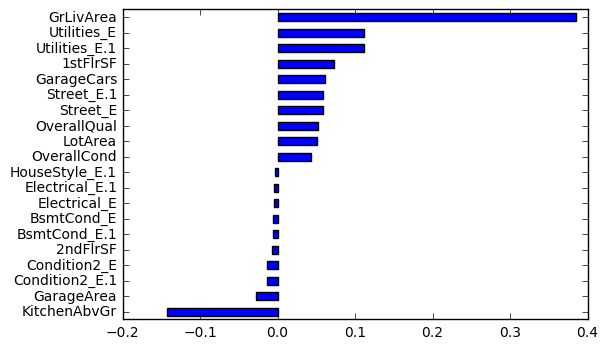

In [33]:
coef = pd.Series(model_ridge.coef_[0], index = X_train.columns).sort_values()
imp_coef = pd.concat([coef.head(10), coef.tail(10)])
imp_coef.plot(kind = "barh")

### It is clear that many features are correlated. 
# [hypothesis] model is overfitted.
### Do unsupervised dimensionality reduction firstly [To Be Done]

## Use recursive feature elimination to further reduce # of features

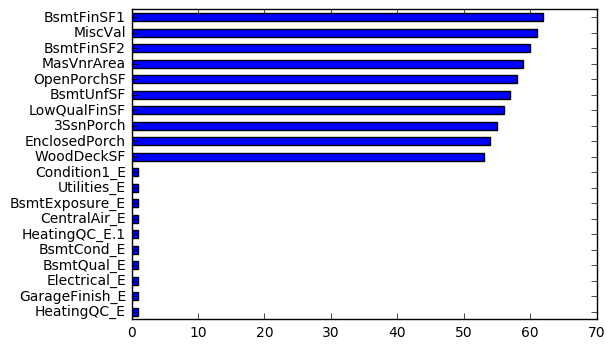

In [28]:
#ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=1.0)
rfe_ridge = RFE(estimator=ridge, step=1)
rfe_ridge.fit(X_train, y_train_log1p)
#print (rfe_ridge.ranking_)
ranking_ridge = pd.Series(rfe_ridge.ranking_, index = X_train.columns).sort_values()
imp_ranking_ridge = pd.concat([ranking_ridge.head(10), ranking_ridge.tail(10)])
imp_ranking_ridge.plot(kind = "barh")
#print(ranking_ridge)
#print(ranking_ridge["BsmtFinSF1"])
#print(ranking_ridge["Street_E.1"])
#print(ranking_ridge["Street_E"])

#ranking_ridge = rfe_ridge.ranking_.reshape(digits.images[0].shape)

# plot pixel ranking
#plt.matshow(ranking_ridge, cmap=plt.cm.Blues)
#plt.colorbar()
#plt.title("Ranking of pixels with RFE")
#plt.show()